In [423]:
#%matploplib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Fuente de informacion repositorio ANID proyectos postulados 2016 a 2020
Macrozona Norte

In [424]:
urlPostulados = 'https://raw.githubusercontent.com/ANID-GITHUB/Postulaciones/main/POSTULACIONES_2016_2020.csv'

dfPostulados = pd.read_csv(urlPostulados,sep=';',header=0,encoding = 'UTF-8',warn_bad_lines=False, error_bad_lines = False,lineterminator='\n') # encoding = "ISO-8859-1"

C:\Users\Asesor 2\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Asesor 2\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


Cambio de nombre de columnas

In [425]:
dfPostulados = dfPostulados.rename(columns=
    {
    'NOMBRE DEL CONCURSO'           : 'NOMBRE_DEL_CONCURSO',
    ' MONTO TOTAL ADJUDICADO (M$) ' : 'MONTO_ADJUDICADO',
    'REGION DE EJECUCION'           : 'REGION',
    'TIPO DE BENEFICIARIO'          : 'TIPO_DE_BENEFICIARIO',
    'TIPO DE INSTITUCION'           : 'TIPO_DE_INSTITUCION',
    'AÑO DE FALLO'                  : 'AÑO',
    'MACRO ZONA\r'                  : 'MACROZONA',
    'ESTADO_RESOLUCION_CONCURSO'    : 'ESTADO_RESOLUCION'
    })

print('****************** POSTULADOS ******************')
print(dfPostulados.columns.tolist())



****************** POSTULADOS ******************
['CODIGO DEL PROYECTO', 'SUBDIRECCION', 'PROGRAMA', 'INSTRUMENTO', 'NOMBRE_DEL_CONCURSO', 'MONTO_ADJUDICADO', 'ESTADO_RESOLUCION', 'DISCIPLINA OECD', 'REGION', 'TIPO_DE_BENEFICIARIO', 'TIPO_DE_INSTITUCION', 'SEXO', 'AÑO', 'MACROZONA']


Construccion de dataframe por macrozona

In [426]:
dfNorte = dfPostulados[['MACROZONA','REGION','TIPO_DE_INSTITUCION','TIPO_DE_BENEFICIARIO','AÑO', 'PROGRAMA', 'INSTRUMENTO','NOMBRE_DEL_CONCURSO','MONTO_ADJUDICADO','ESTADO_RESOLUCION']]
dfNorte = dfNorte.sort_values(by=['REGION','AÑO'])

dfNorte['MACROZONA'] = dfNorte['MACROZONA'].str.replace('\r','')
dfNorte['REGION'] = dfNorte['REGION'].str.replace('\r','')

dfNorte['MONTO_ADJUDICADO'] = dfNorte['MONTO_ADJUDICADO'].str.replace('SE IDENTIFICA AL CIERRE DE LA BECA','')
dfNorte['MONTO_ADJUDICADO'] = dfNorte['MONTO_ADJUDICADO'].str.replace('NO OTORGA RECURSOS FINANCIEROS','')

#dfNorte['MONTO_ADJUDICADO'] = dfNorte['MONTO_ADJUDICADO'].str.extract(r'(\d*[.]*\d*)')
dfNorte['MONTO_ADJUDICADO'] = dfNorte['MONTO_ADJUDICADO'].str.replace('$','')
dfNorte['MONTO_ADJUDICADO'] = dfNorte['MONTO_ADJUDICADO'].str.replace('-','')
dfNorte['MONTO_ADJUDICADO'] = dfNorte['MONTO_ADJUDICADO'].str.replace(' ','')
#dfNorte['MONTO_ADJUDICADO'] = dfNorte['MONTO_ADJUDICADO'].str.replace('.','')

dfNorte['MONTO_ADJUDICADO'] = dfNorte['MONTO_ADJUDICADO'].fillna(0)
dfNorte['MONTO_ADJUDICADO'] = pd.to_numeric(dfNorte['MONTO_ADJUDICADO'], errors='coerce')



#dfNorte.to_excel('../output/proyectos_anid_postulados_MZN.xlsx')

C:\Users\ASESOR~1\AppData\Local\Temp/ipykernel_4668/2206951692.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dfNorte['MONTO_ADJUDICADO'] = dfNorte['MONTO_ADJUDICADO'].str.replace('$','')


Filtros para dataframe

In [427]:
AÑO = 2010

dfNorte = dfNorte[dfNorte.MACROZONA             == "NORTE"]
#dfNorte = dfNorte[dfNorte.PROGRAMA              == "FONDEQUIP"]
dfNorte = dfNorte[dfNorte.TIPO_DE_INSTITUCION   == "UNIVERSIDAD"]
dfNorte = dfNorte[dfNorte.AÑO                   >= AÑO]

In [428]:
dfTarapaca          = dfNorte[dfNorte.REGION == '01. TARAPACA']
dfAricaParinacota   = dfNorte[dfNorte.REGION == '15. ARICA Y PARINACOTA']
dfAntofagasta       = dfNorte[dfNorte.REGION == '02. ANTOFAGASTA']
dfAtacama           = dfNorte[dfNorte.REGION == '03. ATACAMA']

Postulaciones por región '01. TARAPACA' '02. ANTOFAGASTA' '03. ATACAMA' '15. ARICA Y PARINACOTA'

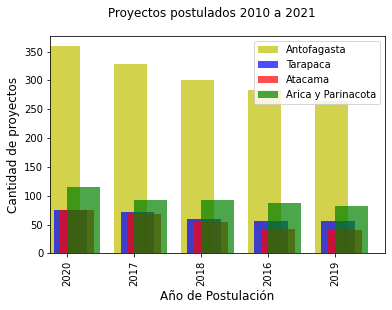

In [429]:
dfResult = dfNorte[['AÑO']].groupby([dfNorte.REGION,dfNorte.AÑO,dfNorte.ESTADO_RESOLUCION,dfNorte.MONTO_ADJUDICADO], dropna=False).count()

dfAntofagasta['AÑO'].value_counts().plot.bar        (label = 'Antofagasta'        ,color='y',position = 0.6,alpha=0.7)
dfTarapaca['AÑO'].value_counts().plot.bar           (label = 'Tarapaca'           ,color='b',position = 0.4,alpha=0.7)
dfAtacama['AÑO'].value_counts().plot.bar            (label = 'Atacama'            ,color='r',position = 0.2,alpha=0.7)
dfAricaParinacota['AÑO'].value_counts().plot.bar    (label = 'Arica y Parinacota' ,color='g',position = 0.0,alpha=0.7)

plt.suptitle('Proyectos postulados 2010 a 2021')
plt.ylabel('Cantidad de proyectos',fontsize=12)
plt.xlabel('Año de Postulación',fontsize=12)
plt.legend()

plt.show()


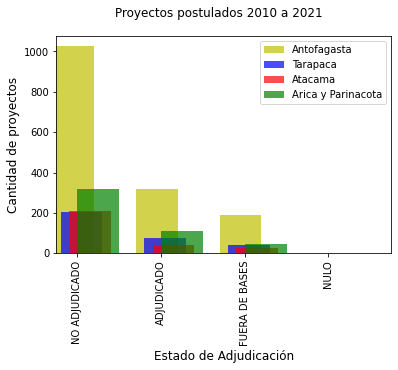

In [430]:
dfAntofagasta['ESTADO_RESOLUCION'].value_counts().plot.bar        (label = 'Antofagasta'        ,color='y',position = 0.6,alpha=0.7)
dfTarapaca['ESTADO_RESOLUCION'].value_counts().plot.bar           (label = 'Tarapaca'           ,color='b',position = 0.4,alpha=0.7)
dfAtacama['ESTADO_RESOLUCION'].value_counts().plot.bar            (label = 'Atacama'            ,color='r',position = 0.2,alpha=0.7)
dfAricaParinacota['ESTADO_RESOLUCION'].value_counts().plot.bar    (label = 'Arica y Parinacota' ,color='g',position = 0.0,alpha=0.7)

plt.suptitle('Proyectos postulados 2010 a 2021')
plt.ylabel('Cantidad de proyectos',fontsize=12)
plt.xlabel('Estado de Adjudicación',fontsize=12)
plt.legend()

plt.show()


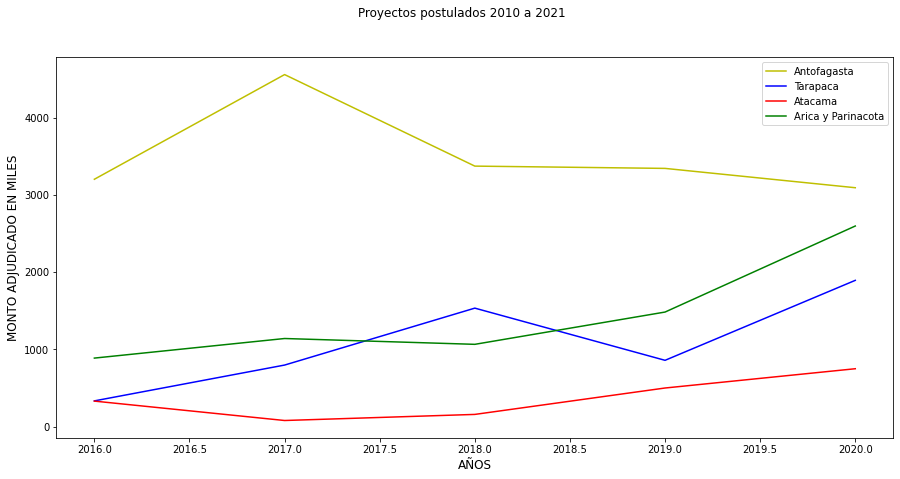

In [455]:


fig, ax = plt.subplots(figsize=(15,7))

dfAntofagasta[dfAntofagasta.ESTADO_RESOLUCION=='ADJUDICADO'].groupby(['AÑO']).sum()['MONTO_ADJUDICADO'].plot(ax=ax,label = 'Antofagasta',color='y')
dfTarapaca[dfTarapaca.ESTADO_RESOLUCION=='ADJUDICADO'].groupby(['AÑO']).sum()['MONTO_ADJUDICADO'].plot(ax=ax,label = 'Tarapaca',color='b')
dfAtacama[dfAtacama.ESTADO_RESOLUCION=='ADJUDICADO'].groupby(['AÑO']).sum()['MONTO_ADJUDICADO'].plot(ax=ax,label = 'Atacama',color='r')
dfAricaParinacota[dfAricaParinacota.ESTADO_RESOLUCION=='ADJUDICADO'].groupby(['AÑO']).sum()['MONTO_ADJUDICADO'].plot(ax=ax,label = 'Arica y Parinacota',color='g')

plt.suptitle('Proyectos postulados 2010 a 2021')
plt.ylabel('MONTO ADJUDICADO EN MILES',fontsize=12)
plt.xlabel('AÑOS',fontsize=12)
plt.legend()

plt.show()
